In [2]:
import pandas as pd
df = pd.read_csv('sentiment.csv', delimiter=',')

In [3]:
#pip install emot

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import scipy
import itertools
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from math import sqrt
from collections import Counter
from random import choice

In [4]:
import nltk
from nltk.corpus import stopwords 
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
from emot.emo_unicode import UNICODE_EMOJI

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer() 

from wordcloud import ImageColorGenerator
from PIL import Image

import warnings
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\I068230\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\I068230\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\I068230\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\I068230\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\I068230\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [5]:
df.location.isna().sum()
df['location'] = df['location'].fillna('Unknown')

In [6]:
eng_stop_words = list(stopwords.words('english'))
emoji = list(UNICODE_EMOJI.keys())

In [7]:
words = set(nltk.corpus.words.words())

In [8]:
eng_stopwords = []
with open('stopwords.txt','r') as file:    
      for line in file:         
          for sw in line.split():            
              eng_stopwords.append(sw)

In [9]:
print(len(words))

235892


In [10]:
def ProcessedTweets1(text):
    #changing tweet text to small letters
    text = text.lower()
    # Removing @ and links 
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split())
    # removing repeating characters
    text = re.sub(r'\@\w+|\#\w+|\d+', '', text)
    # removing punctuation and numbers
    punct = str.maketrans('', '', string.punctuation+string.digits)
    text = text.translate(punct)
    # tokenizing words and removing stop words from the tweet text
    tokens = word_tokenize(text)  
    filtered_words = [w for w in tokens if w not in eng_stopwords]
    filtered_words = [w for w in filtered_words if w not in emoji]
    filtered_words1 = [w2 for w2 in filtered_words if w2 in words or w2 in {'democrats', 'dem', 'dems'}]
    # lemmetizing words
    #lemmatizer = WordNetLemmatizer() 
    #lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    #text = " ".join(lemma_words)
    text = " ".join(filtered_words1)
    return text

In [11]:
df['Processed_Tweets'] = df['tweet'].apply(ProcessedTweets1)

In [13]:
df['Processed_Tweets']

0                                              always spot
1        majority dont head house marc army vet patriot...
2        vote chance give exposure social media dont fo...
3                                                 get vote
4                         thanks democrats ruin everything
                               ...                        
19996               join supporting bold democrats pac via
19997    con cruelty chaos strategy passing substantive...
19998                                b vote celebrity year
19999                               understand people vote
20000                                    next week den dem
Name: Processed_Tweets, Length: 20001, dtype: object

In [14]:
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Function to get sentiment type
#setting the conditions
def sentimenttextblob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive" 

In [15]:
# using the functions to get the polarity and sentiment
df['Polarity'] = df['Processed_Tweets'].apply(polarity)
df['Sentiment'] = df['Polarity'].apply(sentimenttextblob)
sent = df['Sentiment'].value_counts()
sent

Neutral     11191
Positive     5968
Negative     2842
Name: Sentiment, dtype: int64

In [16]:
training_data = df.sample(frac=0.8, random_state=25)
testing_data = df.drop(training_data.index)

print("training samples: {training_data.shape[0]}")
print("testing samples: {testing_data.shape[0]}")


training samples: {training_data.shape[0]}
testing samples: {testing_data.shape[0]}


In [17]:
training_unique = (list(set(training_data['Processed_Tweets'].str.findall("\w+").sum()))) # Finding all the unique words in training data's Tweet column
training_unique_words = len(training_unique)

testing_unique = (list(set(testing_data['Processed_Tweets'].str.findall("\w+").sum()))) # Finding all the unique words in training data's Tweet column
testing_unique_words = len(testing_unique)

print("Unique words in Training Data: {}".format(training_unique_words))
print("Unique words in Test Data: {}".format(testing_unique_words))

#let's print the count and not the actual words, since sentiments.csv will have 100,000 tweets for over 3 months.
#print("Unique words in Training Data: {}".format(training_unique))
#print("Unique words in Testing Data: {}".format(testing_unique))

Unique words in Training Data: 7774
Unique words in Test Data: 4233


In [18]:
#Training Data
train_matrix = [] # Forming a 2D matrix to store all training feature vectors

#Test Data
test_matrix = [] # Forming a 2D matrix to store all test feature vectors

In [ ]:
#Create feature vector containing features count of each word, 
#for all the Processed tweets.

In [22]:
for sentence in training_data['Processed_Tweets']:
    train_featurevec = []
    word = sentence.split()
    for w in training_unique:
        train_featurevec.append(word.count(w))
        #print(train_featurevec)
    train_matrix.append(train_featurevec)
#print(train_matrix)
#Test Data: Extracting features and storing them into the test feature matrix
for sentence in testing_data['Processed_Tweets']:
    test_featurevec = []
    word = sentence.split()
    for w in training_unique:
        test_featurevec.append(word.count(w))
    test_matrix.append(test_featurevec)

In [18]:
print("Shape of Training Matrix: ({0} , {1})".format(len(train_matrix),len(train_matrix[0])))
print("Shape of Test Matrix: ({0} , {1})".format(len(test_matrix),len(test_matrix[0])))

Shape of Training Matrix: (16001 , 7774)
Shape of Test Matrix: (4000 , 7774)


In [19]:
#Calculating distances between every test instance with all the train instances. This returns a 2D distances vector.
dists = cdist(test_matrix,train_matrix,'euclidean') 

# calculate the Euclidean distance between two vectors
#def euclidean_distance(row1, row2):
#	distance = 0.0
#	for i in range(len(row1)-1):
#		distance += (row1[i] - row2[i])**2
#	return sqrt(distance)

In [20]:
#Making an empty column in our test data for predicted labels.
testing_data['Predicted Label'] = ''
dists.shape

(4000, 16001)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
#Initializing lists to be used in plotting later.
acc_list = []
rec_list = []
prec_list = []
f1_list = []

In [26]:
def classifying(train_matrix, test_matrix):
    #training and testing feature vectors
    
    X_train = train_matrix 
    X_test = test_matrix 
    y_train = training_data['Sentiment']
    y_test = testing_data['Sentiment']

    for k in [1,3,5,7]:

        classifier = KNeighborsClassifier(n_neighbors=k) #(n_neighbors=k,algorithm='')
        classifier.fit(X_train, y_train) #Fitting the built-in sklearn classifier on our training data
        predicted_label = classifier.predict(X_test) #Making the classifier to predict on the previously unseen test data.

        accuracy_score = (metrics.accuracy_score(y_test,predicted_label))
        accuracy_score = (round(accuracy_score,2))*100
        acc_list.append(accuracy_score)

        confusion_mat = confusion_matrix(y_test, predicted_label)
        class_report = classification_report(y_test, predicted_label)

        macro_precision = (metrics.precision_score(y_test, predicted_label, average='macro'))
        macro_precision = (round(macro_precision,2))*100
        prec_list.append(macro_precision)

        macro_recall = (metrics.recall_score(y_test, predicted_label, average='macro'))
        macro_recall = (round(macro_recall,2))*100
        rec_list.append(macro_recall)

        macro_f1 = (metrics.f1_score(y_test, predicted_label, average='macro'))
        macro_f1 = (round(macro_f1,2))*100
        f1_list.append(macro_f1)

        print("\n\nConfusion Matrix for k = {} is:\n".format(k))
        print(confusion_mat)
        print("\nClassification Report for k = {} is:\n".format(k))
        print(class_report)
        print("Accuracy Score for k = {0} is: {1}%".format(k,accuracy_score))
        print("Macroaveraged Recall for k = {0} is: {1}%".format(k,macro_recall))
        print("Macroaveraged Precision for k = {0} is: {1}%".format(k,macro_precision))
        print("Macroaveraged F1-score for k = {0} is: {1}%".format(k,macro_f1))

In [27]:
classifying(train_matrix,test_matrix)



Confusion Matrix for k = 1 is:

[[  90  414   34]
 [   5 2195   11]
 [  17  748  486]]

Classification Report for k = 1 is:

              precision    recall  f1-score   support

    Negative       0.80      0.17      0.28       538
     Neutral       0.65      0.99      0.79      2211
    Positive       0.92      0.39      0.55      1251

    accuracy                           0.69      4000
   macro avg       0.79      0.52      0.54      4000
weighted avg       0.76      0.69      0.64      4000

Accuracy Score for k = 1 is: 69.0%
Macroaveraged Recall for k = 1 is: 52.0%
Macroaveraged Precision for k = 1 is: 79.0%
Macroaveraged F1-score for k = 1 is: 54.0%


Confusion Matrix for k = 3 is:

[[  64  459   15]
 [   4 2202    5]
 [  23  848  380]]

Classification Report for k = 3 is:

              precision    recall  f1-score   support

    Negative       0.70      0.12      0.20       538
     Neutral       0.63      1.00      0.77      2211
    Positive       0.95      0.30      

<function matplotlib.pyplot.show(close=None, block=None)>

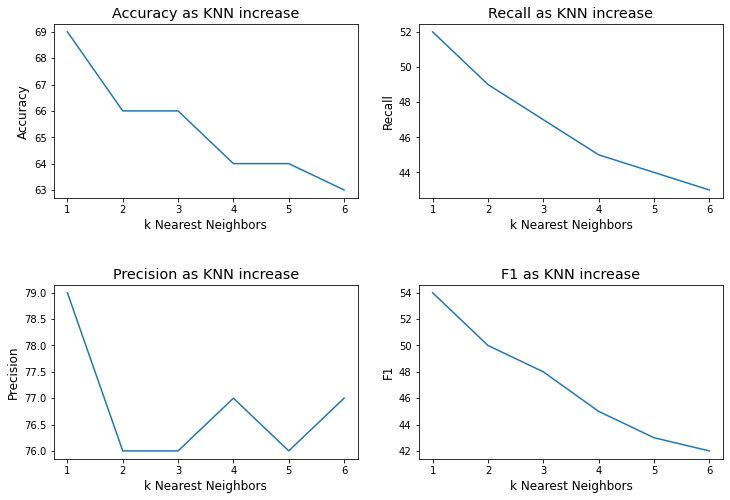

In [25]:
k_ls = [1,3,5,7] 

fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(k_ls,acc_list)
plt.title("Accuracy as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("Accuracy",fontsize='large')

plt.subplot(2,2,2)
plt.plot(k_ls,rec_list)
plt.title("Recall as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("Recall",fontsize='large')

plt.subplot(2,2,3)
plt.plot(k_ls,prec_list)
plt.title("Precision as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("Precision",fontsize='large')

plt.subplot(2,2,4)
plt.plot(k_ls,f1_list)
plt.title("F1 as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("F1",fontsize='large')

fig.subplots_adjust(hspace=.5)

plt.show
